# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [2]:
df = pd.read_csv('albumin_cleaned_4.csv')

In [3]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

KeyError: "['bed_size' 'Cirrhosis' 'tenant'] not found in axis"

In [4]:
df.head()

sex  ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1    1                 0                   1            2.0    6   
1    1    0                 0                   0            0.0    3   
2    1    0                 0                   0            3.0    2   
3    1    0                 0                   2            1.0    2   
4    0    0                 0                   0            0.0    2   

   albumin_24hrs  MELD  qSOFA  beta_blocker  hemorrhagic    LOS_hours  \
0            0.0  11.0      1             1            0  1016.016667   
1            0.0  13.0      2             1            0   698.150000   
2            0.0   9.0      0             0            0   135.266667   
3            1.0   9.0      0             0            0    58.183333   
4            1.0  10.0      0             1            0   333.866667   

   30_day_mortality  30_day_readmission  
0                 0                   0  
1                 0                   0  
2                 0                   0  
3                 0                   0  
4                 0                   0

In [5]:
df.shape

(46629, 14)

In [6]:
df = df.drop(columns=['LOS_hours', '30_day_readmission'])

In [7]:
df['30_day_mortality'].describe()

count    46629.000000
mean         0.060692
std          0.238767
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 30_day_mortality, dtype: float64

In [8]:
#df['albumin_value'].describe()

KeyError: 'albumin_value'

In [9]:
df.describe()

sex           ICU  mass_transfusion  total_transfusions  \
count  46629.000000  46629.000000      46629.000000        46629.000000   
mean       0.545455      0.195458          0.023419            0.655708   
std        0.497935      0.396557          0.151231            1.095456   
min        0.000000      0.000000          0.000000            0.000000   
25%        0.000000      0.000000          0.000000            0.000000   
50%        1.000000      0.000000          0.000000            0.000000   
75%        1.000000      0.000000          0.000000            1.000000   
max        1.000000      1.000000          1.000000            6.000000   

       anemia_status           CCI  albumin_24hrs          MELD         qSOFA  \
count   46629.000000  46629.000000   46629.000000  46629.000000  46629.000000   
mean        1.742199      3.359412       0.042506     11.752025      0.416329   
std         1.083163      2.633050       0.201742      6.436456      0.642641   
min         0.000000      0.000000       0.000000      6.000000      0.000000   
25%         1.000000      1.000000       0.000000      7.000000      0.000000   
50%         2.000000      3.000000       0.000000      9.000000      0.000000   
75%         3.000000      5.000000       0.000000     14.000000      1.000000   
max         3.000000     19.000000       1.000000     40.000000      3.000000   

       beta_blocker   hemorrhagic  30_day_mortality  
count  46629.000000  46629.000000      46629.000000  
mean       0.311373      0.054816          0.060692  
std        0.463060      0.227623          0.238767  
min        0.000000      0.000000          0.000000  
25%        0.000000      0.000000          0.000000  
50%        0.000000      0.000000          0.000000  
75%        1.000000      0.000000          0.000000  
max        1.000000      1.000000          1.000000

## Standardize Data

In [10]:
cols = df.columns

#instantiate min-max scaling object
mm = MinMaxScaler()
# fit and transform feature dataframe
df = pd.DataFrame(mm.fit_transform(df))
# reassign column names so new dataframe has corresponding names
df.columns = cols

In [11]:
df.head()

sex  ICU  mass_transfusion  total_transfusions  anemia_status       CCI  \
0  1.0  1.0               0.0            0.166667       0.666667  0.315789   
1  1.0  0.0               0.0            0.000000       0.000000  0.157895   
2  1.0  0.0               0.0            0.000000       1.000000  0.105263   
3  1.0  0.0               0.0            0.333333       0.333333  0.105263   
4  0.0  0.0               0.0            0.000000       0.000000  0.105263   

   albumin_24hrs      MELD     qSOFA  beta_blocker  hemorrhagic  \
0            0.0  0.147059  0.333333           1.0          0.0   
1            0.0  0.205882  0.666667           1.0          0.0   
2            0.0  0.088235  0.000000           0.0          0.0   
3            1.0  0.088235  0.000000           0.0          0.0   
4            1.0  0.117647  0.000000           1.0          0.0   

   30_day_mortality  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

## Modeling

In [12]:
# establish target feature, 30 day mortality, as y feature
y = df['30_day_mortality']
# drop target feature from features dataframe
X = df.drop(columns = ['30_day_mortality'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [13]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Logistic Regression

In [14]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(C=0.3, penalty='l1', solver = 'liblinear')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=0.3, penalty='l1', solver='liblinear')

Feature: sex Score: -0.02604
Feature: ICU Score: 0.58437
Feature: mass_transfusion Score: 0.68365
Feature: total_transfusions Score: -0.06945
Feature: anemia_status Score: -0.49938
Feature: CCI Score: 3.23989
Feature: albumin_24hrs Score: 0.54865
Feature: MELD Score: 1.57033
Feature: qSOFA Score: 1.56824
Feature: beta_blocker Score: -0.34025
Feature: hemorrhagic Score: 0.63367


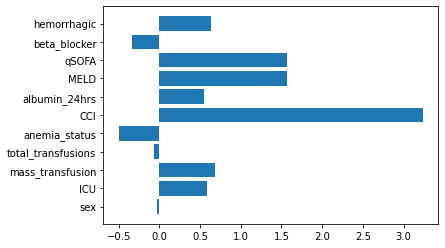

In [15]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                    Importance
CCI                  25.530949
MELD                  4.808214
qSOFA                 4.798184
mass_transfusion      1.981097
hemorrhagic           1.884508
ICU                   1.793861
albumin_24hrs         1.730910
sex                   0.974300
total_transfusions    0.932906
beta_blocker          0.711593
anemia_status         0.606908


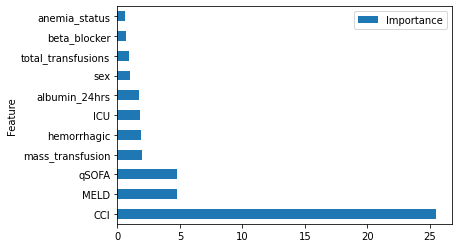

In [16]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [17]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [18]:
# calculate residual differences between train data and predictions
residuals = np.abs(y_train - y_hat_train)
# print value counts of predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# print normalized value counts of predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.0    35005
1.0     2298
Name: 30_day_mortality, dtype: int64
----------------------------------
0.0    0.938396
1.0    0.061604
Name: 30_day_mortality, dtype: float64


In [19]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[34949    77]
 [ 2221    56]]


In [20]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     35026
         1.0       0.42      0.02      0.05      2277

    accuracy                           0.94     37303
   macro avg       0.68      0.51      0.51     37303
weighted avg       0.91      0.94      0.91     37303



In [21]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[8767    6]
 [ 544    9]]


In [22]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8773
         1.0       0.60      0.02      0.03       553

    accuracy                           0.94      9326
   macro avg       0.77      0.51      0.50      9326
weighted avg       0.92      0.94      0.91      9326



## Decision Tree

In [23]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier()
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Feature: sex Score: 0.07016
Feature: ICU Score: 0.02945
Feature: mass_transfusion Score: 0.01963
Feature: total_transfusions Score: 0.12361
Feature: anemia_status Score: 0.12251
Feature: CCI Score: 0.20117
Feature: albumin_24hrs Score: 0.02124
Feature: MELD Score: 0.27408
Feature: qSOFA Score: 0.05276
Feature: beta_blocker Score: 0.05185
Feature: hemorrhagic Score: 0.03353


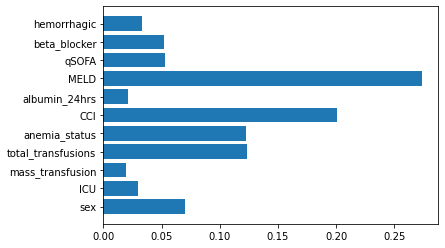

In [24]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [25]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [26]:
# calculate residual differences between train data and predictions
residuals = np.abs(y_train - y_hat_train)
# print value counts of predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# print normalized value counts of predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.0    36593
1.0      710
Name: 30_day_mortality, dtype: int64
----------------------------------
0.0    0.980967
1.0    0.019033
Name: 30_day_mortality, dtype: float64


In [27]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[35017     9]
 [  701  1576]]


In [28]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     35026
         1.0       0.99      0.69      0.82      2277

    accuracy                           0.98     37303
   macro avg       0.99      0.85      0.90     37303
weighted avg       0.98      0.98      0.98     37303



In [29]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[8313  460]
 [ 495   58]]


In [30]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      8773
         1.0       0.11      0.10      0.11       553

    accuracy                           0.90      9326
   macro avg       0.53      0.53      0.53      9326
weighted avg       0.89      0.90      0.90      9326



In [33]:
df['30_day_mortality'].value_counts()

0.0    43799
1.0     2830
Name: 30_day_mortality, dtype: int64

## Tree Structure

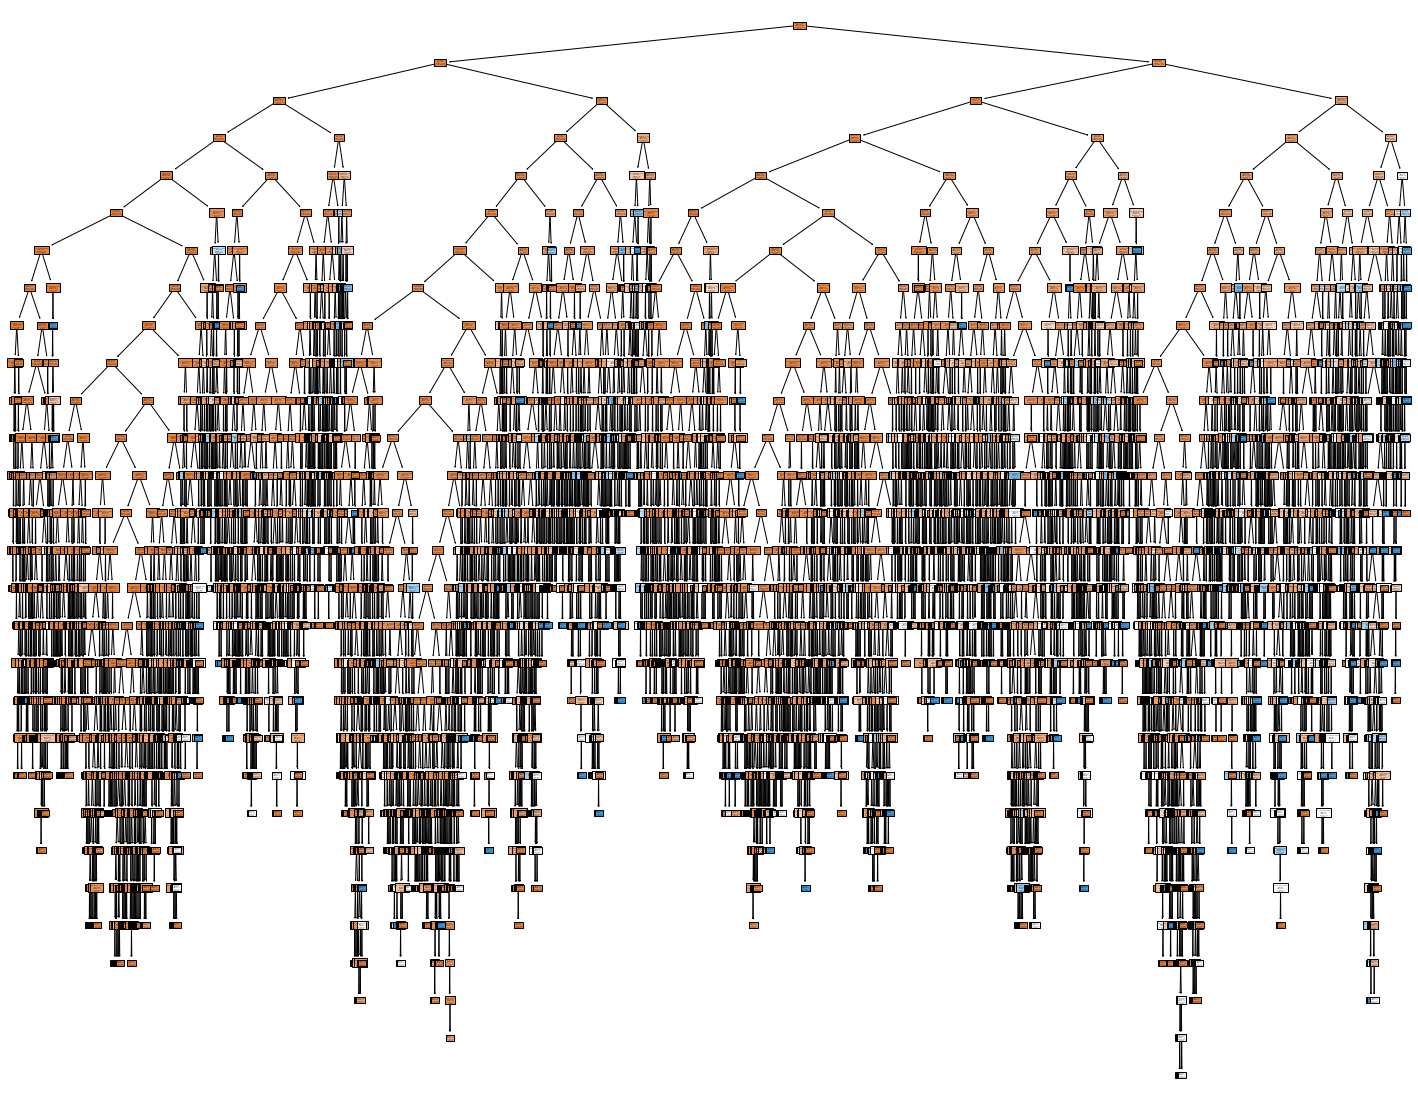

In [31]:
feature_names = df.columns.tolist()
class_names = ['0', '1']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

[Text(188.87336342565573, 213.69103448275862, 'X[8] <= 0.167\ngini = 0.115\nsamples = 37303\nvalue = [35026, 2277]'),
 Text(102.70040099912454, 206.19310344827585, 'X[5] <= 0.237\ngini = 0.072\nsamples = 24657\nvalue = [23740, 917]'),
 Text(63.97596859080899, 198.6951724137931, 'X[10] <= 0.5\ngini = 0.045\nsamples = 18132\nvalue = [17713, 419]'),
 Text(49.57513956793993, 191.19724137931036, 'X[1] <= 0.5\ngini = 0.04\nsamples = 17641\nvalue = [17278, 363]'),
 Text(36.992166841135116, 183.69931034482758, 'X[6] <= 0.5\ngini = 0.032\nsamples = 15197\nvalue = [14951, 246]'),
 Text(24.929466810884303, 176.20137931034483, 'X[5] <= 0.079\ngini = 0.029\nsamples = 14997\nvalue = [14773, 224]'),
 Text(6.96412625502871, 168.70344827586206, 'X[3] <= 0.583\ngini = 0.012\nsamples = 6879\nvalue = [6836, 43]'),
 Text(4.151429714407754, 161.2055172413793, 'X[7] <= 0.044\ngini = 0.011\nsamples = 6709\nvalue = [6672, 37]'),
 Text(1.0928185160806014, 153.70758620689656, 'X[4] <= 0.833\ngini = 0.002\nsample

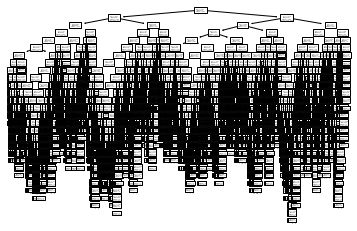

In [34]:
tree.plot_tree(dt)
plt.show()

## Decision Tree No 2 (Example)

In [55]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=5)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

Feature: sex Score: 0.00000
Feature: ICU Score: 0.05324
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.01036
Feature: CCI Score: 0.16754
Feature: albumin_24hrs Score: 0.06557
Feature: MELD Score: 0.25754
Feature: qSOFA Score: 0.35945
Feature: beta_blocker Score: 0.00000
Feature: hemorrhagic Score: 0.08631


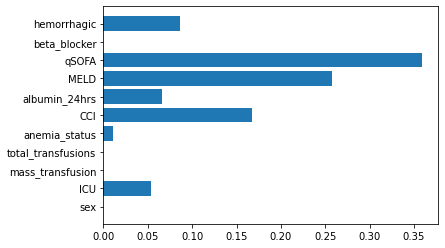

In [56]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [57]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [58]:
# calculate residual differences between train data and predictions
residuals = np.abs(y_train - y_hat_train)
# print value counts of predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# print normalized value counts of predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.0    35027
1.0     2276
Name: 30_day_mortality, dtype: int64
----------------------------------
0.0    0.938986
1.0    0.061014
Name: 30_day_mortality, dtype: float64


In [59]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[34977    49]
 [ 2227    50]]


In [60]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     35026
         1.0       0.51      0.02      0.04      2277

    accuracy                           0.94     37303
   macro avg       0.72      0.51      0.51     37303
weighted avg       0.91      0.94      0.91     37303



In [61]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[8760   13]
 [ 543   10]]


In [62]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      8773
         1.0       0.43      0.02      0.03       553

    accuracy                           0.94      9326
   macro avg       0.69      0.51      0.50      9326
weighted avg       0.91      0.94      0.91      9326



## Tree Structure

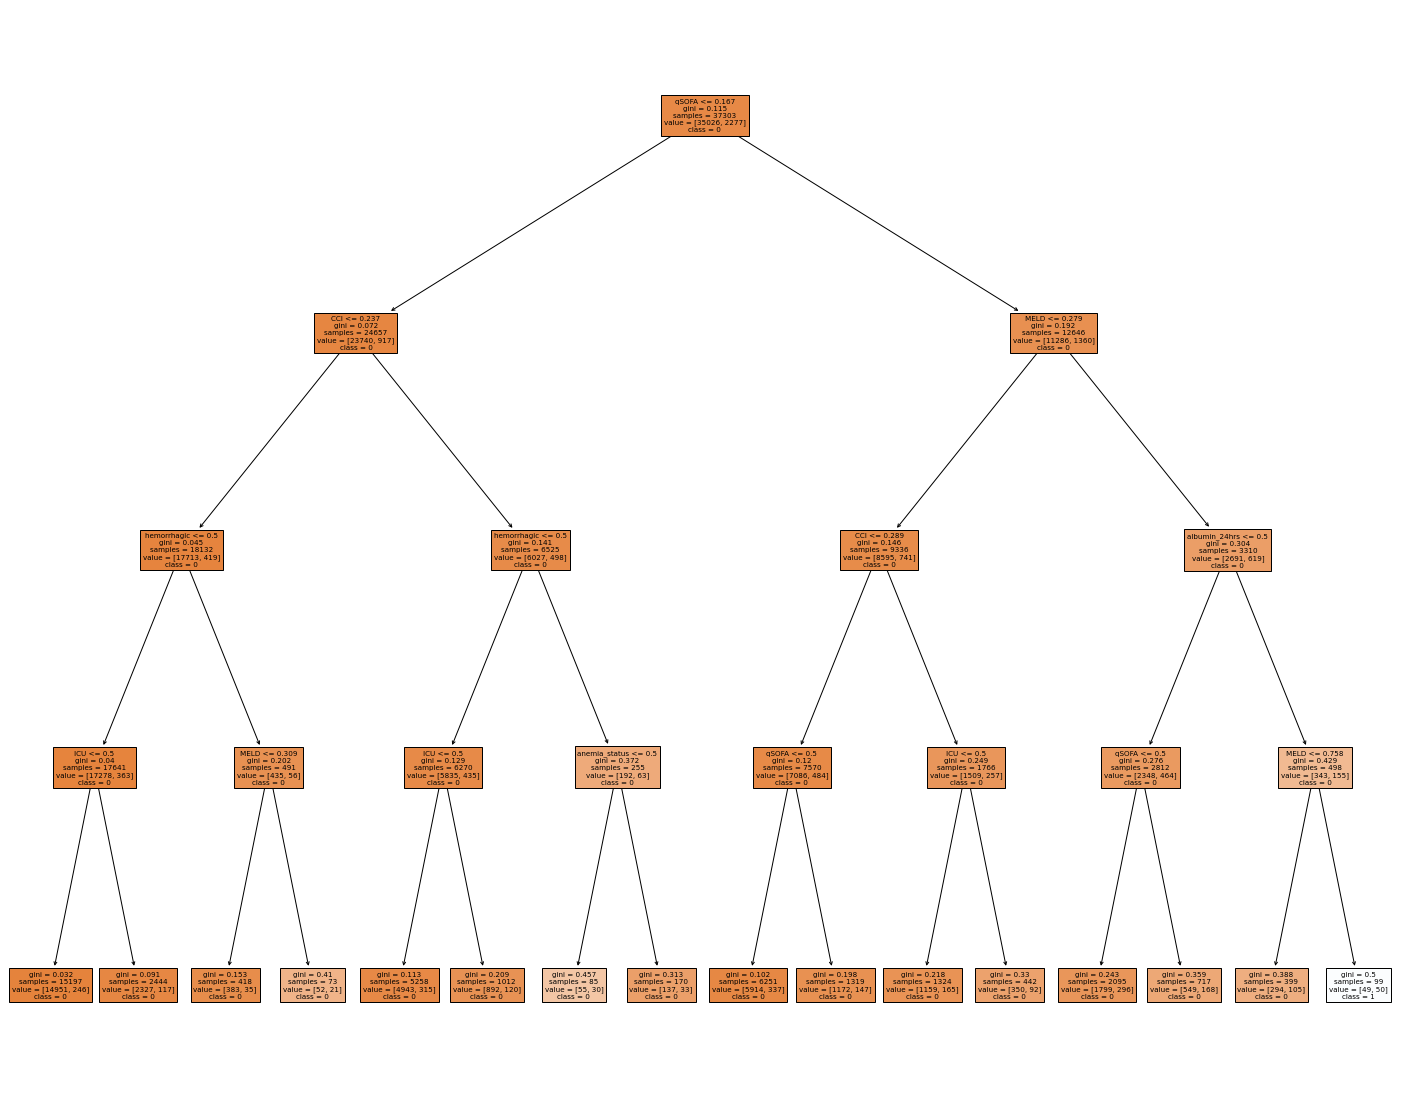

In [63]:
feature_names = df.columns.tolist()
class_names = ['0', '1']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)